In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

# Wykres

In [2]:
wypadki = pd.read_csv("wypadki.csv",sep=";")
wypadki

WypadkiDrogowe   Rok  Wartosc
0   wypadki ogółem  2000    57331
1   wypadki ogółem  2001    53799
2   wypadki ogółem  2002    53559
3   wypadki ogółem  2003    51078
4   wypadki ogółem  2004    51069
..             ...   ...      ...
58           ranni  2016    40766
59           ranni  2017    39466
60           ranni  2018    37359
61           ranni  2019    35477
62           ranni  2020    26463

[63 rows x 3 columns]

In [3]:
wypadkiw = wypadki[wypadki.WypadkiDrogowe == 'wypadki ogółem']
wypadkir= wypadki[wypadki.WypadkiDrogowe == 'ranni']
wypadkis = wypadki[wypadki.WypadkiDrogowe== 'ofiary śmiertelne']

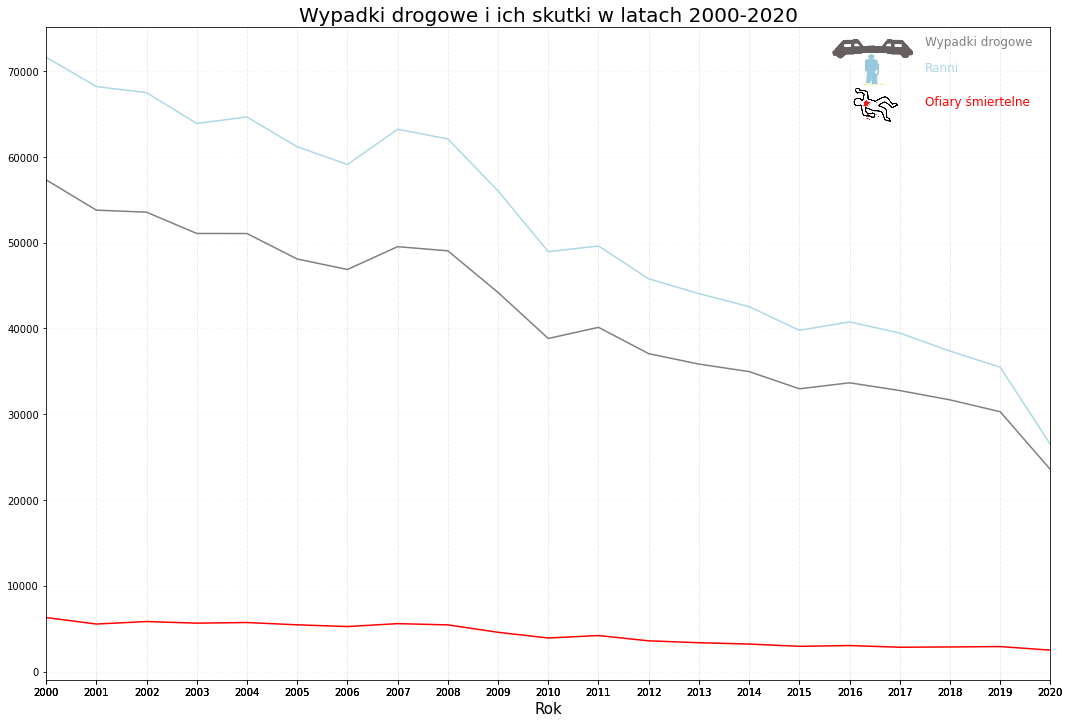

In [4]:
def getImage(paths):
    return OffsetImage(plt.imread(path),zoom=0.3)
def getImage1(paths):
    return OffsetImage(plt.imread(path),zoom=0.09)
paths = ['obraz_wypadki.png','obraz_ranni.png']
paths1 = ['obraz_zabici.png']


fig = plt.figure(figsize =(18, 12))
ax = plt.gca()
wypadkiw.plot(kind='line', x='Rok',y='Wartosc',ax=ax,label = None,color='grey',legend=None)
wypadkir.plot(kind='line',x='Rok',y='Wartosc', ax=ax, label = None,color='lightblue',legend=None)
wypadkis.plot(kind='line',x='Rok',y='Wartosc', ax=ax, label = None,color='red',legend=None)

xlim = wypadki.Rok
ylim = wypadki.Wartosc
plt.xticks(wypadki.Rok)

T=[2016.5,2016.5]
r=[73000,70000]

T1 = [2016.5]
r1 = [66000]

for x0, y0, path in zip(T,r,paths):
    ab = AnnotationBbox(getImage(paths), (x0, y0), frameon=False)
    ax.add_artist(ab)
for x0, y0, path in zip(T1,r1,paths1):
    ab = AnnotationBbox(getImage1(paths), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.annotate('Wypadki drogowe', xy = (2017.5,r[0]),size = 12 ).set_color('grey')
plt.annotate('Ranni', xy = (2017.5,r[1]),size = 12 ).set_color('lightblue')
plt.annotate('Ofiary śmiertelne', xy = (2017.5,r1[0]),size = 12 ).set_color('red')
plt.xlim(2000,2020)
plt.xlabel('Rok',fontsize=15)

ax.grid( color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.1)

plt.title('Wypadki drogowe i ich skutki w latach 2000-2020',fontsize=20)
plt.savefig('wypadki')

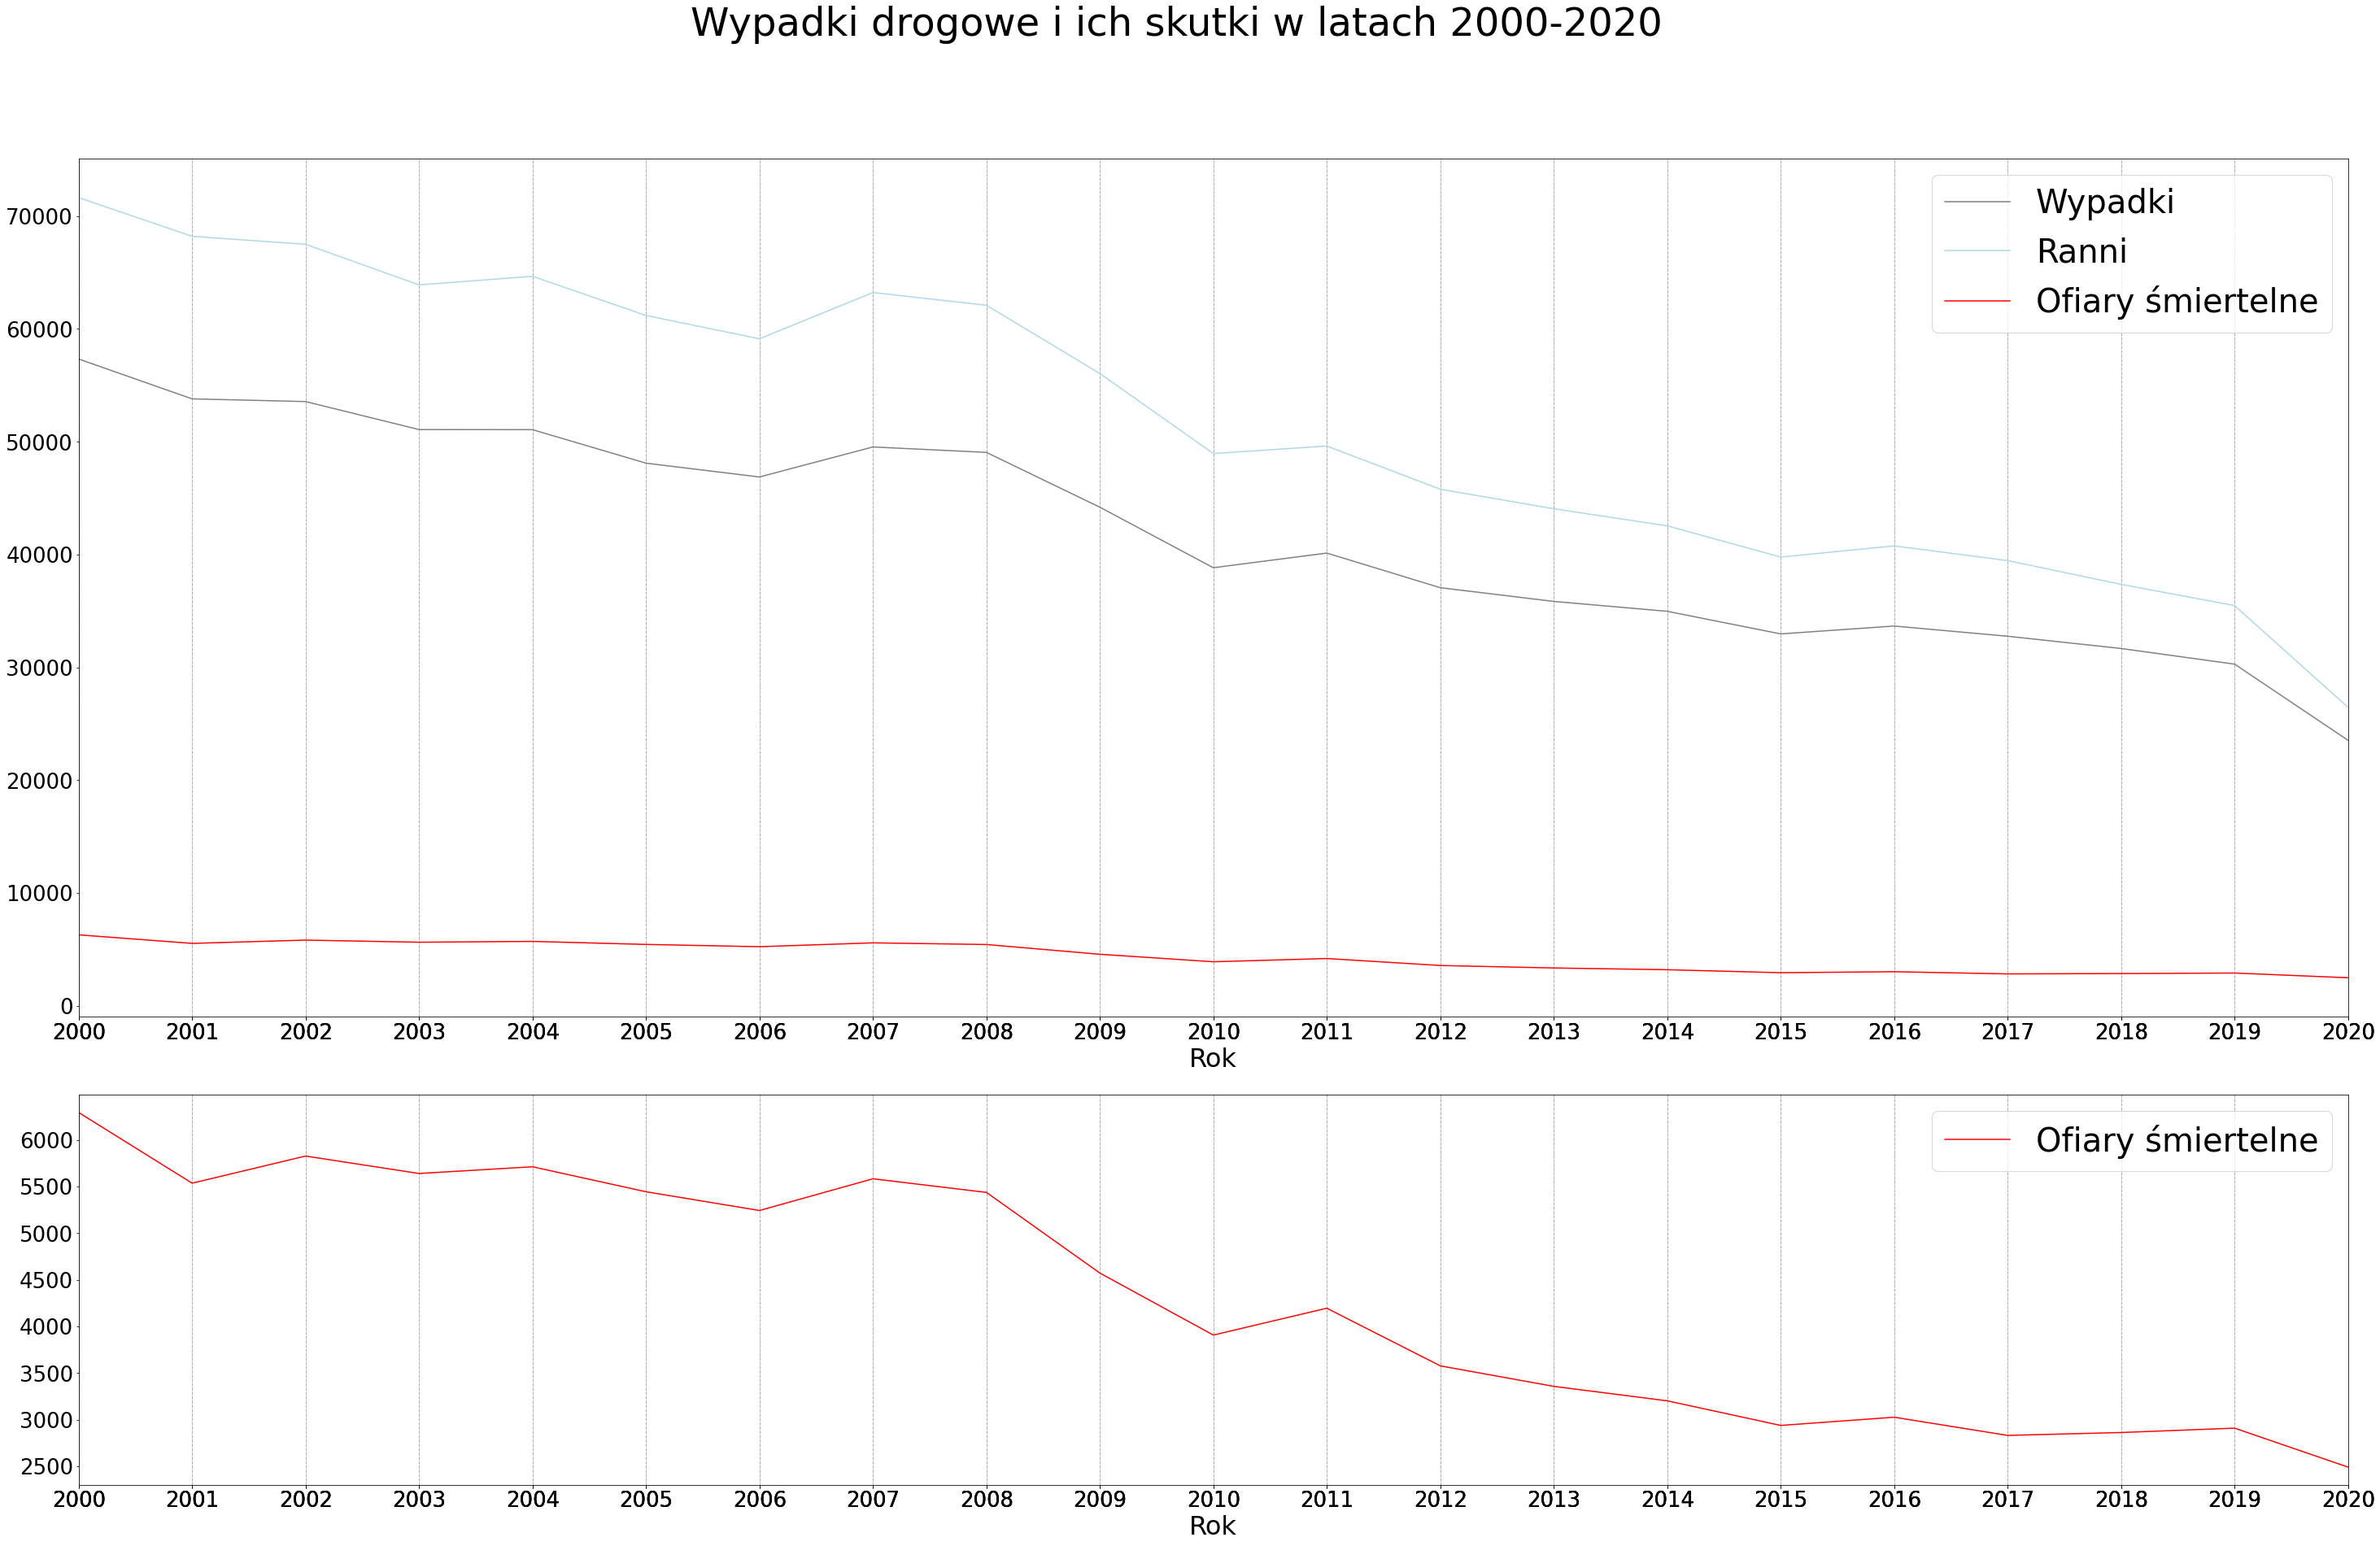

In [5]:
from matplotlib import gridspec 

fig = plt.figure(figsize =(50, 30))
plt.rcParams["figure.autolayout"] = True
plt.figtext(.5,0.95,'Wypadki drogowe i ich skutki w latach 2000-2020',fontsize=48, ha='center')

ax1 = plt.subplot2grid(shape=(3, 3), loc=(0, 0),colspan=3,rowspan=2)

wypadkiw.plot(kind='line', x='Rok',y='Wartosc',ax=ax1,color='grey',label="Wypadki")
wypadkir.plot(kind='line',x='Rok',y='Wartosc', ax=ax1,color='lightblue',label="Ranni")
wypadkis.plot(kind='line',x='Rok',y='Wartosc', ax=ax1,color='red',label='Ofiary śmiertelne')

xlim = wypadki.Rok
ylim = wypadki.Wartosc
plt.xticks(wypadki.Rok,fontsize=26)
plt.yticks(fontsize=26)
plt.legend(fontsize=40)
plt.xlabel('Rok',fontsize=32)
ax1.xaxis.grid( color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
plt.xlim(2000,2020)


ax2 = plt.subplot2grid(shape=(3, 3), loc=(2, 0),colspan=3)
wypadkis.plot(kind='line',x='Rok',y='Wartosc', ax=ax2, label = 'Ofiary śmiertelne',color='red')
xlim = wypadki.Rok
ylim = wypadki.Wartosc
plt.xticks(wypadki.Rok,fontsize=26)
plt.yticks(fontsize=26)
plt.legend(fontsize=40)
plt.xlabel('Rok',fontsize=32)
plt.xlim(2000,2020)
ax2.xaxis.grid( color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

# plt.tight_layout()
plt.savefig('wypadki2')

In [6]:
plt.rcParams.update(plt.rcParamsDefault)

# Wykres

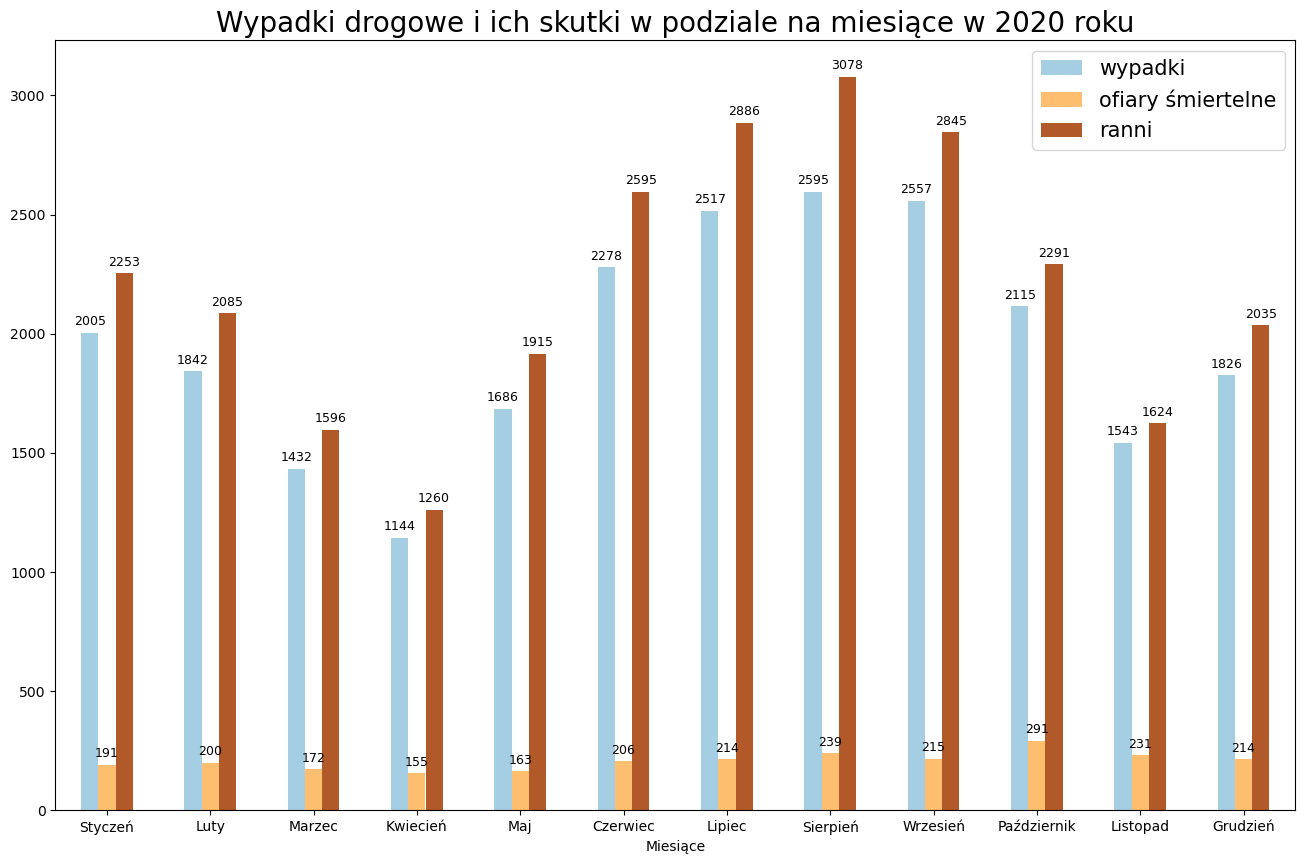

In [7]:
miesiace = pd.read_excel('miesiące.xlsx')
miesiace.index = miesiace['miesiace']
miesiace1 = miesiace.drop(columns=['miesiace'])

fig = plt.figure(figsize=(16,10))
ax = plt.gca()
miesiace1.plot(kind='bar',ax=ax,rot=0,cmap='Paired')
for i in ax.patches:
    plt.annotate(format(i.get_height()),
                   (i.get_x() + i.get_width()/2,
                    i.get_height() + 0.5), ha='center', va='center',
                   size=9, xytext=(0, 8),textcoords='offset points')
ax.grid(False)
plt.xlabel('Miesiące')
plt.legend(fontsize=15)
plt.title('Wypadki drogowe i ich skutki w podziale na miesiące w 2020 roku', fontsize=20)
plt.savefig('miesiace')
plt.show()

# Wykres

In [8]:
czas = pd.read_excel('czas.xlsx')
czas

godzina dzień tygodnia  wypadki  ofiary śmiertelne  ranni  cieżko ranni  \
0          0   poniedziałek       29                  5     36            11   
1          0         wtorek       13                  1     14             4   
2          0          środa       26                  5     25             9   
3          0       czwartek       26                  3     34             7   
4          0         piątek       31                 12     36             8   
..       ...            ...      ...                ...    ...           ...   
163       23          środa       41                  9     48            15   
164       23       czwartek       43                  8     45            14   
165       23         piątek       84                 21     97            40   
166       23         sobota       81                 15     99            39   
167       23      niedziela       37                  6     48            18   

     lekko ranni  
0             25  
1             10  
2             16  
3             27  
4             28  
..           ...  
163           33  
164           31  
165           57  
166           60  
167           30  

[168 rows x 7 columns]

In [9]:
wypadki_czas = czas.pivot_table(values='wypadki', index='godzina' , columns='dzień tygodnia')
wypadki_czas = wypadki_czas.reindex(columns = ['poniedziałek', 'wtorek', 'środa', 'czwartek', 'piątek', 
                                           'sobota', 'niedziela' ])
ofiary_czas= czas.pivot_table(values='ofiary śmiertelne', index='godzina' , columns='dzień tygodnia')
ofiary_czas = ofiary_czas.reindex(columns = ['poniedziałek', 'wtorek', 'środa', 'czwartek', 'piątek', 
                                           'sobota', 'niedziela' ])
ranni_czas = czas.pivot_table(values='ranni', index='godzina' , columns='dzień tygodnia')
ranni_czas =ranni_czas.reindex(columns = ['poniedziałek', 'wtorek', 'środa', 'czwartek', 'piątek', 
                                           'sobota', 'niedziela' ])


In [10]:
from matplotlib.colors import ListedColormap

In [11]:
c = np.linspace(0,1,191)
colors= plt.get_cmap('Blues', 191)(c)
cmap = ListedColormap(colors)

<ipython-input-12-81ae298979ba>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
<ipython-input-12-81ae298979ba>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)


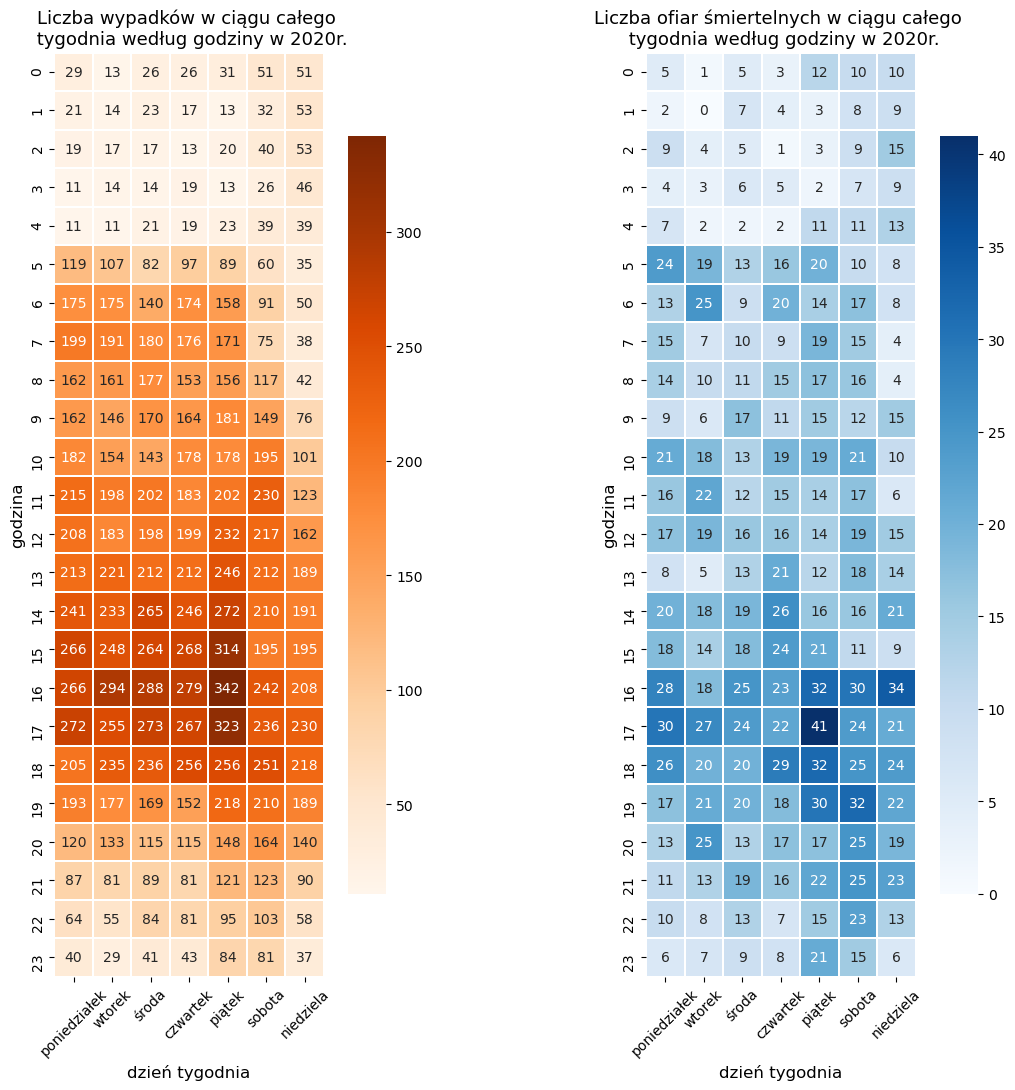

In [12]:
fig=plt.figure(figsize=(14,12))

plt.subplot(121)
ax1 = fig.add_subplot(121)
sns.heatmap(wypadki_czas, annot= True, fmt='.0f', cmap= 'Oranges', square=True, cbar_kws={"shrink": 0.82}, linewidths=0.8)
ax1.set_title('Liczba wypadków w ciągu całego \n tygodnia według godziny w 2020r.', fontsize=13)
ax1.set_xlabel('dzień tygodnia', fontsize=12)
ax1.set_ylabel('godzina', fontsize=12)
ax1.set_xticklabels(wypadki_czas, rotation = 45)

plt.subplot(122)
ax2 = fig.add_subplot(122)
sns.heatmap(ofiary_czas, annot= True, fmt='.0f', cmap= 'Blues', square=True,cbar_kws={"shrink": .82},linewidths=0.8)
ax2.set_title('Liczba ofiar śmiertelnych w ciągu całego \n tygodnia według godziny w 2020r.', fontsize=13)
ax2.set_xlabel('dzień tygodnia', fontsize=12)
ax2.set_ylabel('godzina', fontsize=12)
ax2.set_xticklabels(wypadki_czas, rotation = 45)
    
plt.savefig('czas1')    
plt.show()

<ipython-input-13-91d8fc43c17d>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
<ipython-input-13-91d8fc43c17d>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)


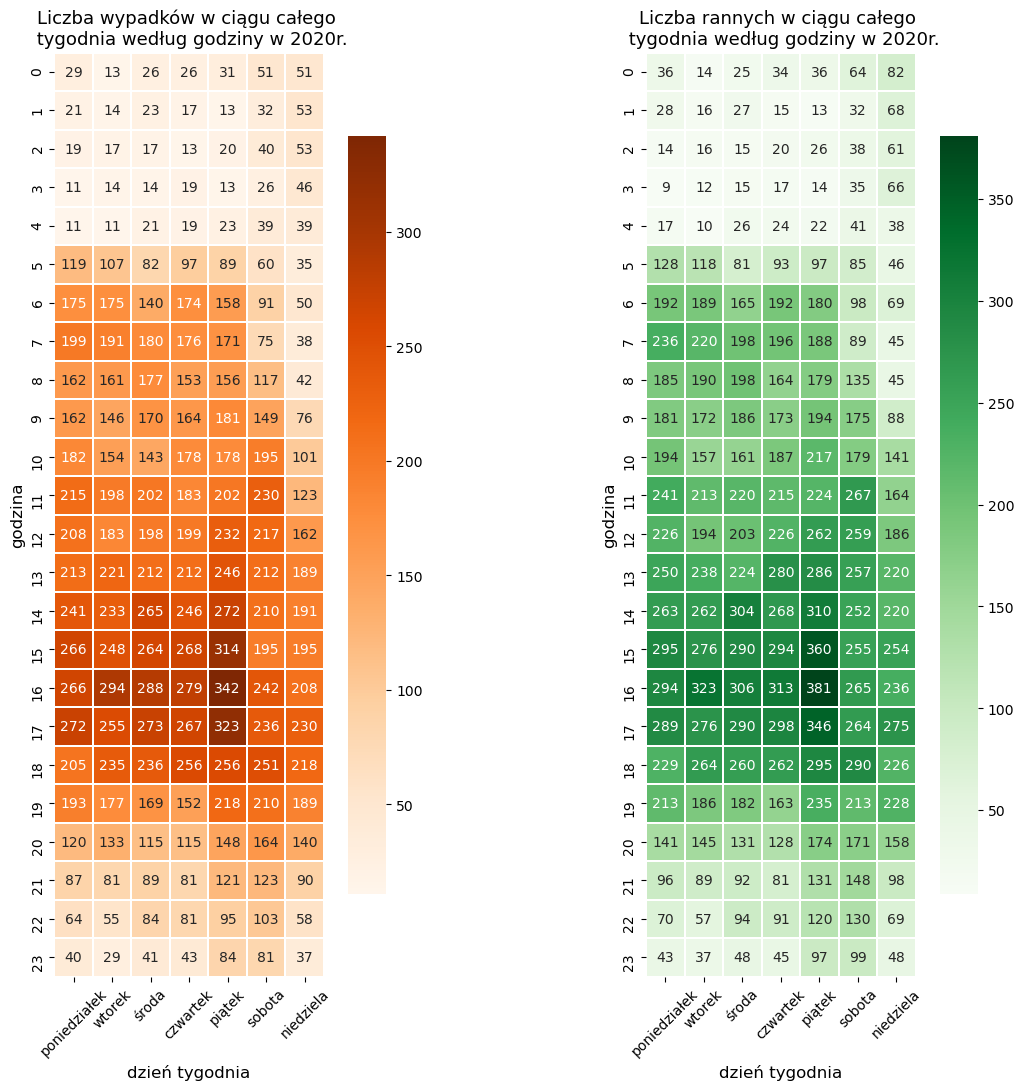

In [13]:
fig=plt.figure(figsize=(14,12))

plt.subplot(121)
ax1 = fig.add_subplot(121)
sns.heatmap(wypadki_czas, annot= True, fmt='.0f', cmap= 'Oranges', square=True, cbar_kws={"shrink": 0.82}, linewidths=0.8)
ax1.set_title('Liczba wypadków w ciągu całego \n tygodnia według godziny w 2020r.', fontsize=13)
ax1.set_xlabel('dzień tygodnia', fontsize=12)
ax1.set_ylabel('godzina', fontsize=12)
ax1.set_xticklabels(wypadki_czas, rotation = 45)

plt.subplot(122)
ax2 = fig.add_subplot(122)
sns.heatmap(ranni_czas, annot= True, fmt='.0f', cmap= 'Greens', square=True,cbar_kws={"shrink": .82},linewidths=0.8)
ax2.set_title('Liczba rannych w ciągu całego \n tygodnia według godziny w 2020r.', fontsize=13)
ax2.set_xlabel('dzień tygodnia', fontsize=12)
ax2.set_ylabel('godzina', fontsize=12)
ax2.set_xticklabels(wypadki_czas, rotation = 45)

plt.savefig('czas2')
plt.show()

# Wykres

In [14]:
wina20 = pd.read_csv('wina20.csv',sep=';')
wina20

przyczyny wypadków  Wartosc
0                wina kierujących pojazdami - ogółem    20999
1  wina kierujących pojazdami - niedostosowanie p...     5516
2  wina kierujących pojazdami - nieprzestrzeganie...     5708
3  wina kierujących pojazdami - nieprawidłowe wyp...     1036
4  wina kierujących pojazdami - nieprawidłowe zac...     2817
5  wina kierujących pojazdami - niezachowanie bez...     1535
6             wina kierujących pojazdami - pozostałe     4387
7                             wina pieszych - ogółem     1385
8     wina pieszych - nieostrożne wejście na jezdnię      830

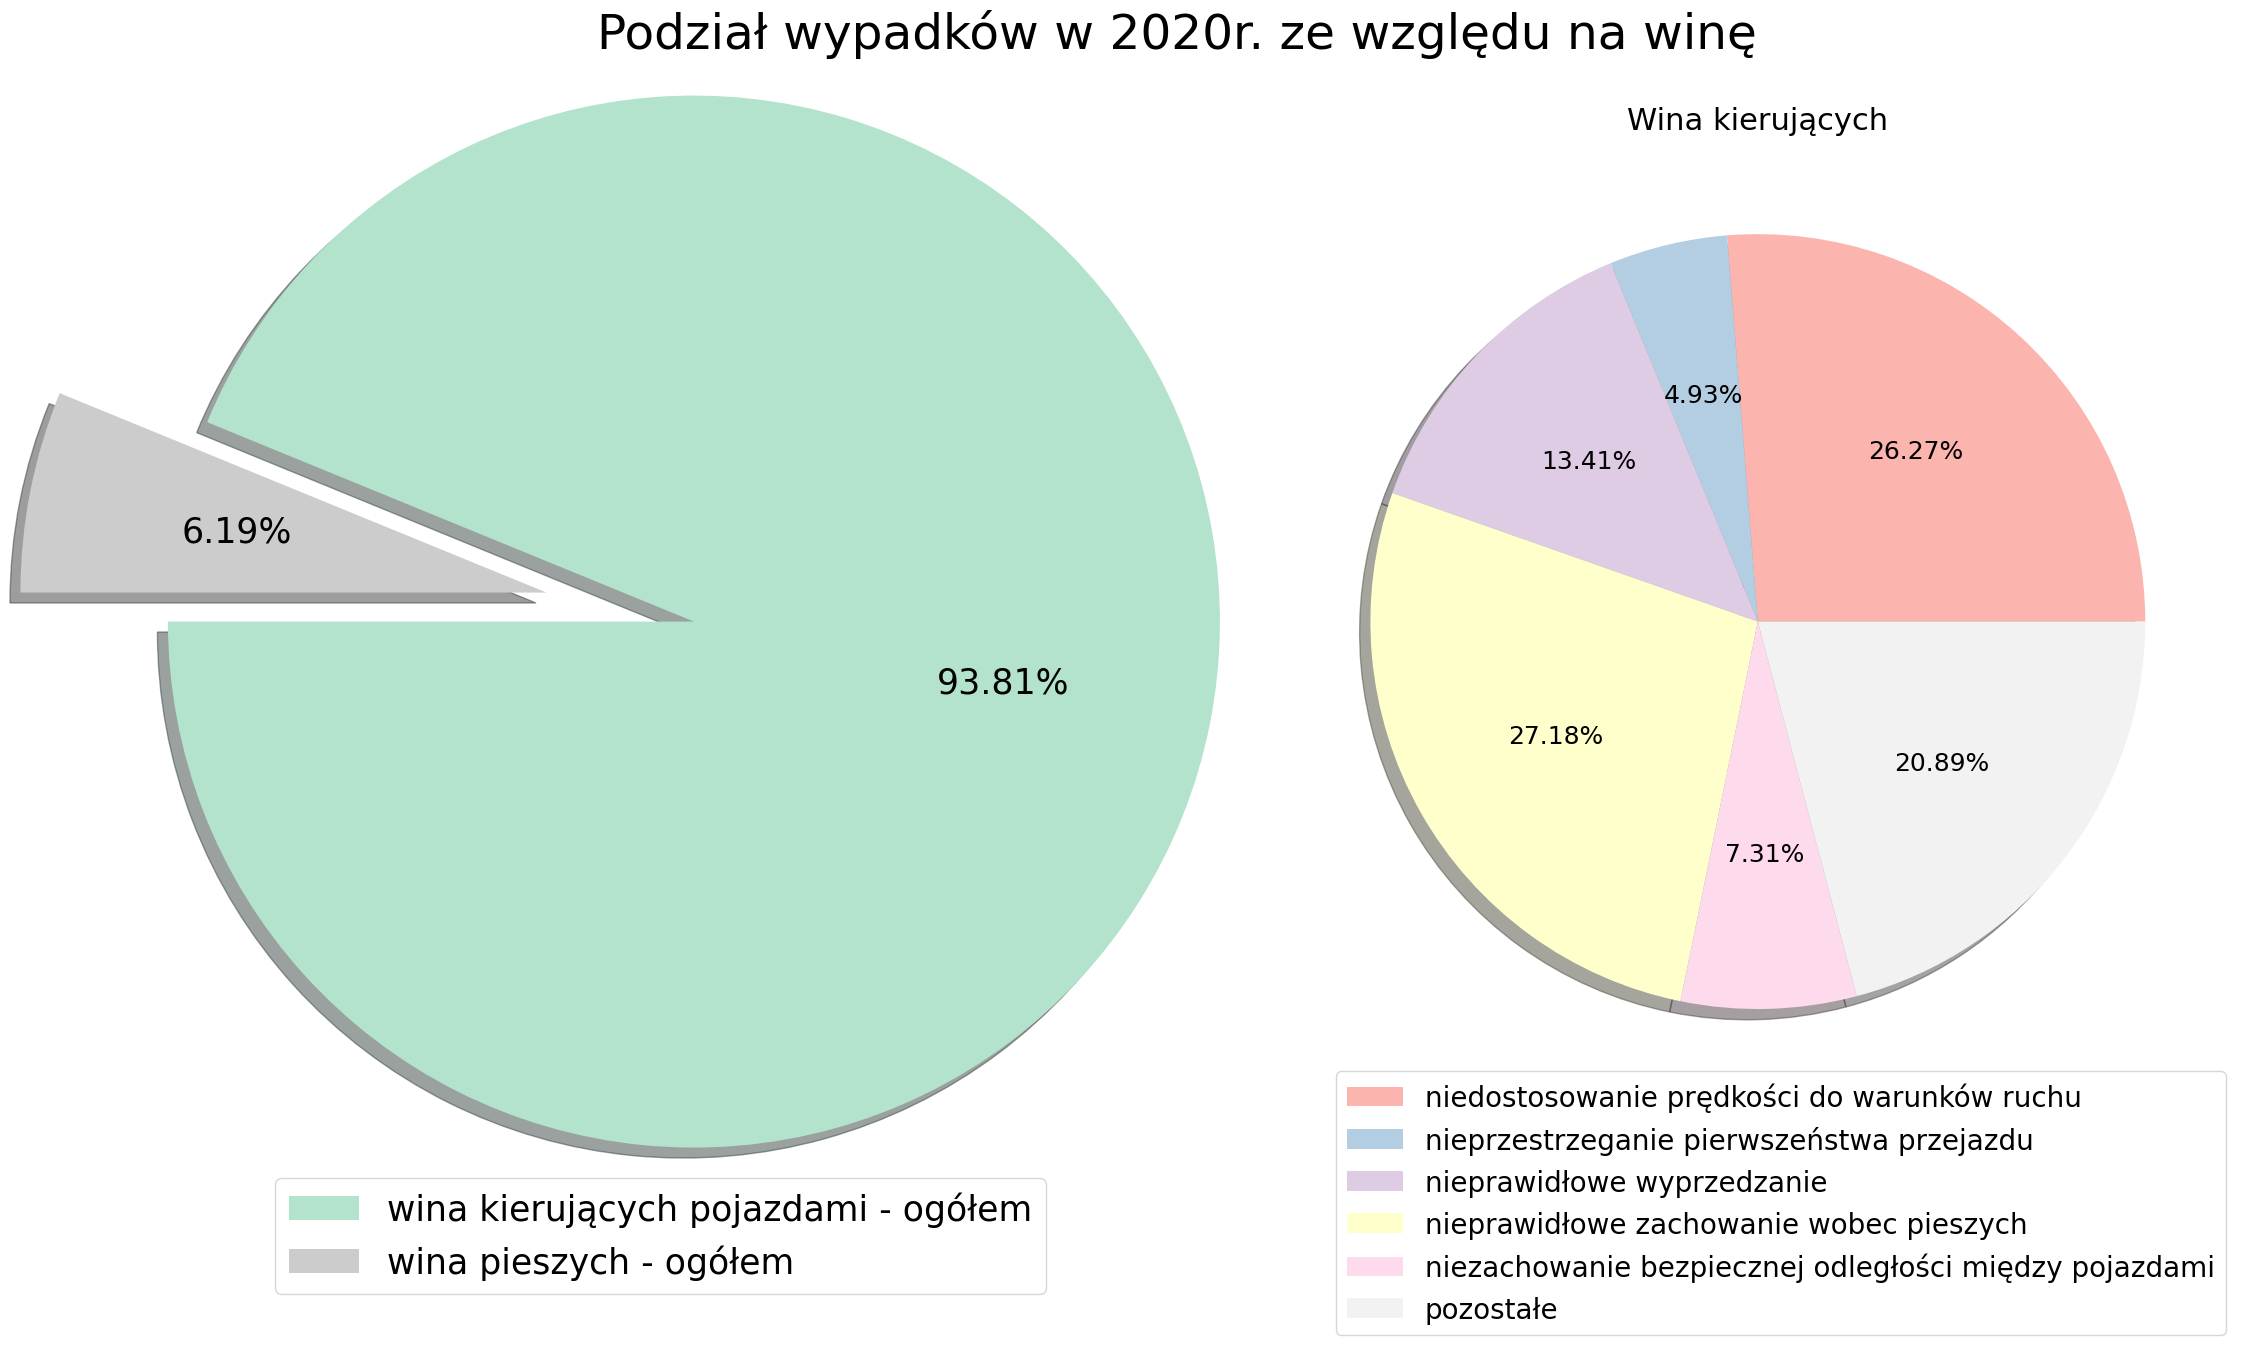

In [15]:
indexNames = wina20[ (wina20['przyczyny wypadków'] != 'wina kierujących pojazdami - ogółem') & (wina20['przyczyny wypadków'] != 'wina pieszych - ogółem') ].index
wina201 = wina20.drop(indexNames)
wina202 = wina20.drop([0,7,8])

fig = plt.figure(figsize=(24,14))



ax1 = plt.subplot(1,2,1)
ax1.axis('equal')
explode = (0, 0.4)
labels = wina201['przyczyny wypadków']
wina201.groupby(['przyczyny wypadków']).sum().plot(kind='pie',y = 'Wartosc',autopct='%1.2f%%',ax=ax1,startangle=180,radius=1.4,explode=explode,shadow=True,cmap='Pastel2',labels=None,textprops={'fontsize': 25})
plt.ylabel('')
ax1.legend(labels,loc=2,bbox_to_anchor=(0.05, 0.05),fontsize=25)


ax2 = plt.subplot(1,2,2)
labels = wina202['przyczyny wypadków']
wina202.groupby(['przyczyny wypadków']).sum().plot(kind='pie', y='Wartosc',autopct='%1.2f%%',ax=ax2,cmap='Pastel1',labels=None,shadow=True,textprops={'fontsize': 18})
plt.ylabel('')
labels=['niedostosowanie prędkości do warunków ruchu', 'nieprzestrzeganie pierwszeństwa przejazdu', 'nieprawidłowe wyprzedzanie',
'nieprawidłowe zachowanie wobec pieszych', 'niezachowanie bezpiecznej odległości między pojazdami', 'pozostałe']
ax2.legend(labels=labels,loc=2,bbox_to_anchor=(0.05, 0.05),fontsize=20)
ax2.set_title('Wina kierujących',fontsize=22)

fig.tight_layout(pad=3.0)
plt.suptitle('Podział wypadków w 2020r. ze względu na winę ',fontsize=35)
plt.savefig('wina')

# Wykres

In [21]:
uczestnicy20 = pd.read_excel('uczestnicy20.xlsx')
y_wiek = uczestnicy20['wiek']
x_M = uczestnicy20['mezczyzni']
x_K = uczestnicy20['kobiety'] * -1
x_K1 = uczestnicy20['kobiety'] 

In [22]:
import plotly.graph_objects as gp
import plotly.offline

fig = gp.Figure()
  

fig.add_trace(gp.Bar(y= y_wiek, x = x_M, 
                     name = 'Mężczyźni', 
                     orientation = 'h'))
  

fig.add_trace(gp.Bar(y = y_wiek, x = x_K,
                     name = 'Kobiety', orientation = 'h'))
  

fig.update_layout(title = 'Ilość wypadków w jakich uczestniczyły dane grupy wiekowe w 2020 roku: ',
                 title_font_size = 14, barmode = 'relative',
                 bargap = 0.0, # przerwa miedzy paskami
                 bargroupgap = 0,
                 xaxis = dict(tickvals = [-6000, -4000, -2000,
                                          0, 2000, 4000, 6000],
                                
                              ticktext = ['6000', '4000', '2000', '0', 
                                          '2000', '4000', '6000']
                             ))
# fig.write_html("path/to/file.html")  
plotly.offline.plot(fig, filename = 'file.html')
fig.show()

In [23]:
plt.rcParams.update(plt.rcParamsDefault)

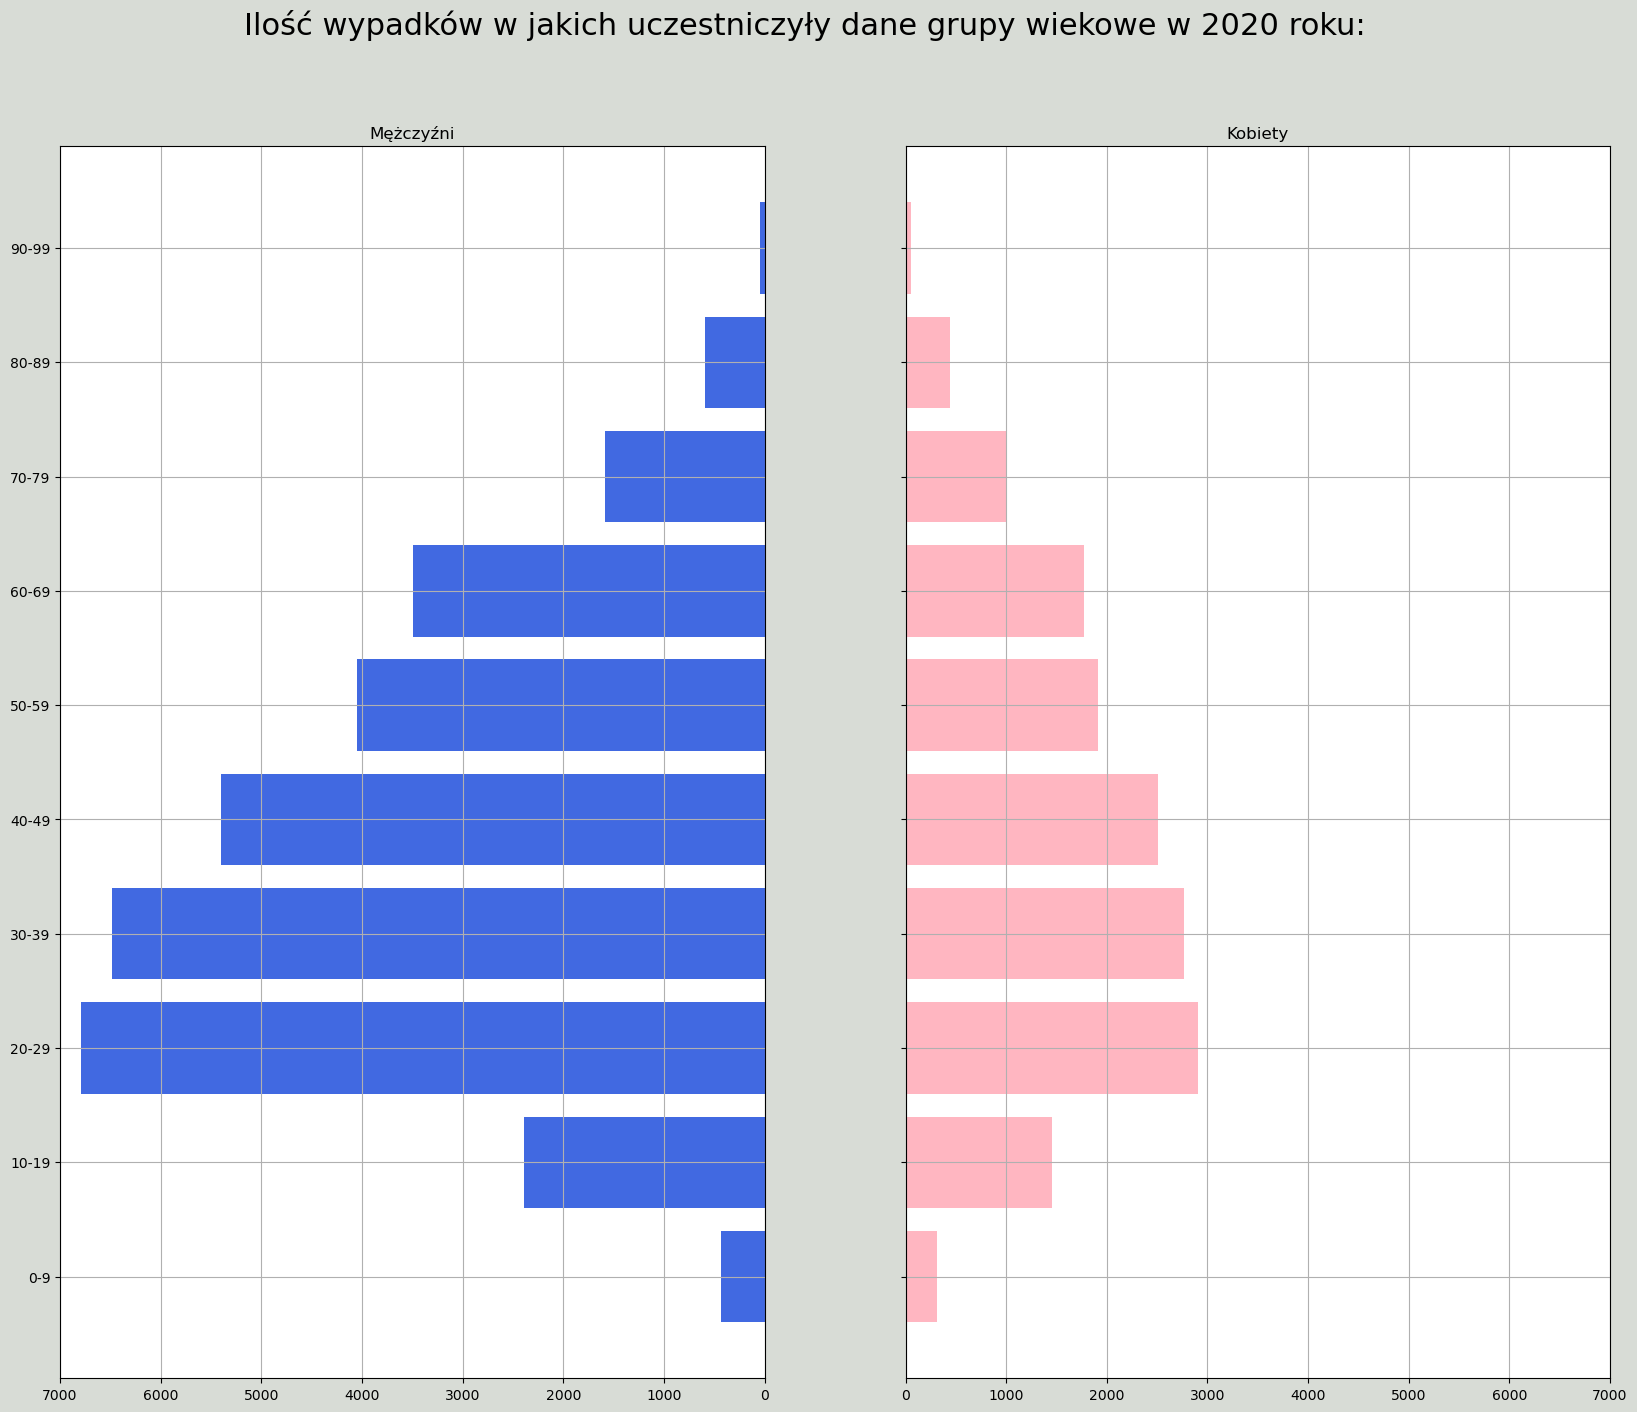

In [24]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(20, 16))


fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.95,"Ilość wypadków w jakich uczestniczyły dane grupy wiekowe w 2020 roku: ", fontsize=22,ha='center')   


axes[0].barh(y_wiek, x_M, align='center', color='royalblue')
axes[0].set(title='Mężczyźni')
axes[0].set(xlim=(0,7000))
axes[1].barh(y_wiek, x_K1, align='center', color='lightpink')
axes[1].set(title='Kobiety')
axes[1].set(xlim=(0,7000))

axes[1].grid()
axes[0].set(yticks=y_wiek, yticklabels=uczestnicy20['wiek'])
axes[0].invert_xaxis()
axes[0].grid()


plt.savefig('uczestnicy20',facecolor=fig.get_facecolor())
plt.show()

# Wykres

<ipython-input-27-2e193f717b46>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



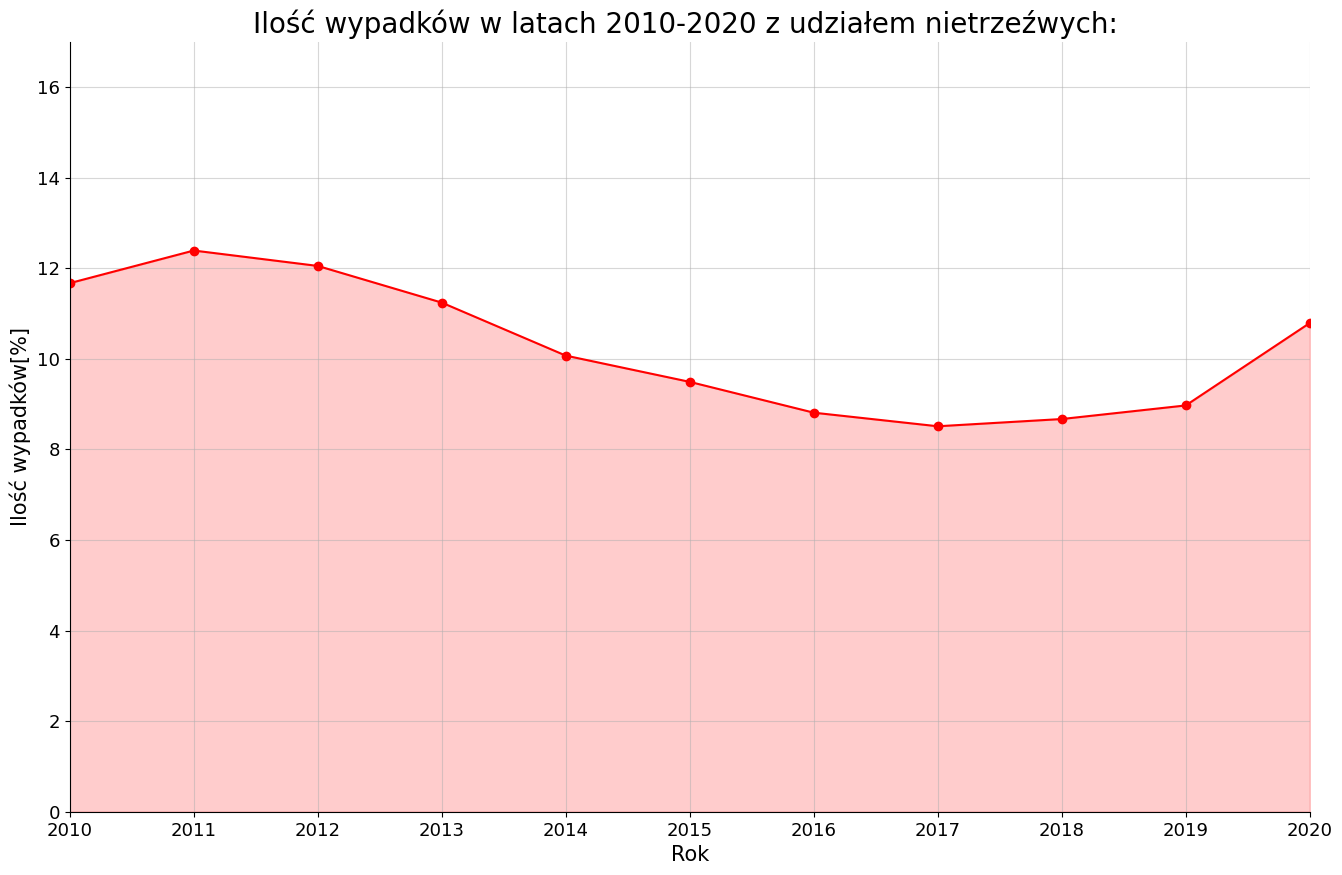

In [27]:
nietrzezwi = pd.read_excel('nietrzezwi.xlsx')

wypadkiw10 = wypadkiw[wypadki['Rok'] >=2010]

indeksy = []
wszystkie_wypadki = []
for i in range(0,len(wypadkiw10)):
    wszystkie_wypadki.append(wypadkiw10.iloc[i, 2])
    indeksy.append(wypadkiw10.iloc[i,1])
nietrzezwi_wypadki = []
for i in range(0,len(nietrzezwi)):
    nietrzezwi_wypadki.append(nietrzezwi.iloc[i,1])

procnietrzezwi = []
for i in range(len(wszystkie_wypadki)):
    p = round((nietrzezwi_wypadki[i]/wszystkie_wypadki[i])*100,2)
    procnietrzezwi.append(p)
    
fig = plt.figure(figsize=(16,10))
ax=plt.gca()
plt.plot(indeksy,procnietrzezwi,'-ok',color='red')
plt.title('Ilość wypadków w latach 2010-2020 z udziałem nietrzeźwych: ',fontsize=20)
plt.xticks(indeksy)
plt.fill_between(indeksy,procnietrzezwi,color='red',alpha=0.2)
plt.ylim(0,17)
plt.xlim(2010,2020)
ax.grid(True,alpha=0.5)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xlabel('Rok',fontsize=15)
plt.ylabel('Ilość wypadków[%]',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.tight_layout()
plt.savefig('nietrzezwi')
plt.show()    